# Evaluation and visualiation of result

Some library is needed for analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Comparing across all models:

In [2]:
# Model names and their corresponding accuracies
model_names = [
    "1.Simple CNN",
    "2.Complex CNN (Regularized)",
    "3.Complex CNN (LR Adjustment + Regularized)",
    "4.More Complex CNN (Regularized)",
    "5.Simple Resnet",
    "6.Resnet (Complex Head + Regularized)",
    "7.Unfrizzed Resnet (Complex Head + Regularized)",
    "8.Simple CNN",
    "9.Complex CNN (Regularization)",
    "10.Complex CNN (LR Adjustment + Regularized)",
    "11.More Complex CNN (Regularized)",
    "12.Simple Resnet",
    "13.Resnet (Complex Head + Regularized)",
    "14.Unfrizzed Resnet (Complex Head + Regularized)",
]

accuracies = [
    87.66,
    92.26,
    90.90,
    92.96,
    82.67,
    82.55,
    94.88,
    88.28,
    90.75,
    90.71,
    91.75,
    94.75,
    96.00,
    98.48,
]

In [3]:
# Define colors for each model category
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


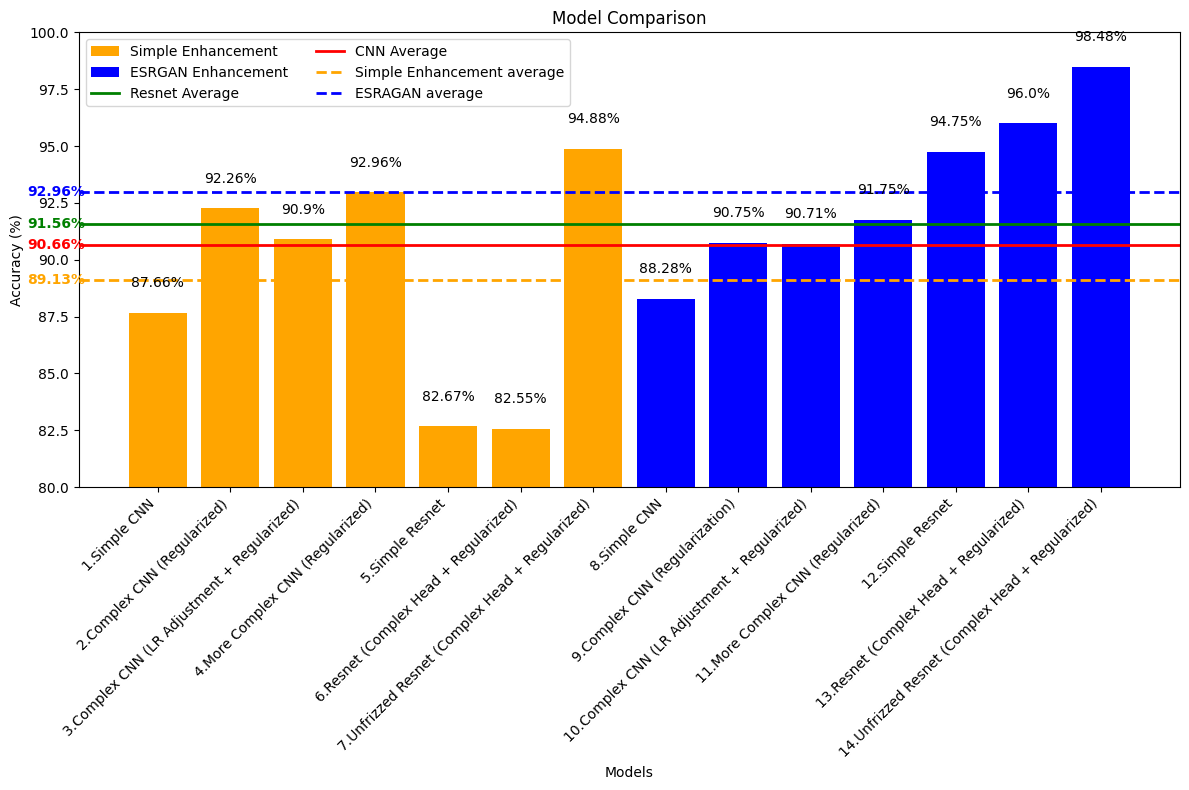

In [4]:
# Create a bar plot to compare the models
plt.figure(figsize=(12, 8))
bars = plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')

# Add labels for each bar with adjusted vertical alignment (va)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 1, f'{accuracy}%', ha='center', va='bottom')

# Calculate the average accuracy for "Simple Enhancement" models (orange)
simple_enhancement_avg = sum(accuracies[:7]) / 7
# Calculate the average accuracy for "ESRGAN Enhancement" models (blue)
esrgan_enhancement_avg = sum(accuracies[7:]) / 7

# Calculate the average accuracy for all "Resnet" models
resnet_avg = sum(accuracies[4:7] + accuracies[11:]) / 6

# Calculate the average accuracy for all "CNN" models
cnn_avg = sum(accuracies[:4] + accuracies[7:11]) / 8

# Add solid lines for the averages of Resnet and CNN models
plt.axhline(y=resnet_avg, color='green', linestyle='-', label='Resnet Avg', linewidth=2)
plt.axhline(y=cnn_avg, color='red', linestyle='-', label='CNN Avg', linewidth=2)

# Label the averages on the y-axis (adjust the x-coordinate to move them to the left)
plt.text(-1, resnet_avg, f'{resnet_avg:.2f}%', ha='right', va='center', color='green', fontweight='bold')
plt.text(-1, cnn_avg, f'{cnn_avg:.2f}%', ha='right', va='center', color='red', fontweight='bold')

# Add dotted lines for the averages
plt.axhline(y=simple_enhancement_avg, color='orange', linestyle='--', label='Simple Enhancement Avg', linewidth=2)
plt.axhline(y=esrgan_enhancement_avg, color='blue', linestyle='--', label='ESRGAN Enhancement Avg', linewidth=2)

# Label the averages on the y-axis (adjust the x-coordinate to move them to the left)
plt.text(-1, simple_enhancement_avg, f'{simple_enhancement_avg:.2f}%', ha='right', va='center', color='orange', fontweight='bold')
plt.text(-1, esrgan_enhancement_avg, f'{esrgan_enhancement_avg:.2f}%', ha='right', va='center', color='blue', fontweight='bold')

# Create legend labels for the categories
legend_labels = ['Simple Enhancement', 'ESRGAN Enhancement', 'Resnet Average', 'CNN Average',
                "Simple Enhancement average", "ESRAGAN average"]

# Add legend for model categories on the side
plt.legend(handles=[
    plt.Rectangle((0, 0), 1, 1, fc='orange'),
    plt.Rectangle((0, 0), 1, 1, fc='blue'),
    plt.Line2D([0], [0], color='green', lw=2, label='Resnet Avg'),
    plt.Line2D([0], [0], color='red', lw=2, label='CNN Avg'),
    plt.Line2D([0], [0], color='orange', linestyle='--', lw=2, label='Simple Enhancement Avg'),
    plt.Line2D([0], [0], color='blue', linestyle='--', lw=2, label='ESRGAN Enhancement Avg'),
], labels=legend_labels, loc='upper left', ncol=2)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.ylim(80, 100)
plt.tight_layout()
plt.show()


# Box and whisker plot for models in different categories

In [5]:
# Data for Simple Enhancement and ESRGAN Enhancement
simple_enhancement_data = [87.66, 92.26, 90.90, 92.96, 82.67, 82.55, 94.88]
esrgan_enhancement_data = [88.28, 90.75, 90.71, 91.75, 94.75, 96.00, 98.48]

# Data for CNN and ResNet
cnn_data = [87.66, 92.26, 90.90, 92.96, 88.28, 90.75, 90.71, 91.75]
resnet_data = [82.67, 82.55, 94.88, 94.75, 96.0, 98.48]

# Labels for the box and whisker plot
labels = ['Simple Enhancement', 'ESRGAN Enhancement', 'CNN', 'ResNet']

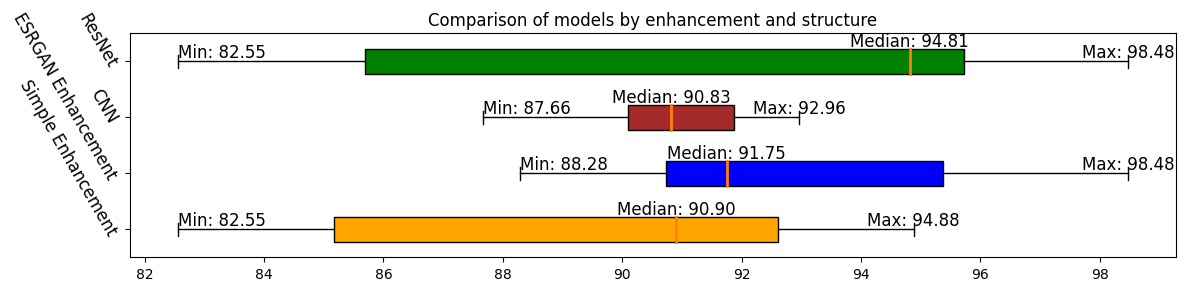

In [40]:
# Combine the data
data = [simple_enhancement_data, esrgan_enhancement_data, cnn_data, resnet_data]

# Create a box and whisker plot
plt.figure(figsize=(12, 3))
bp = plt.boxplot(data, labels=labels, vert=False, patch_artist=True, medianprops={'linewidth': 2})

# Set labels and title
# plt.xlabel('Accuracy(%)')
plt.title('Comparison of models by enhancement and structure', fontsize=12)
plt.yticks(rotation=-60, rotation_mode='anchor', va='top', fontsize=12)

# Color the boxes for each category
colors = ['orange', 'blue','brown','green']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
# Label median, min, and max for all boxes
for i, box in enumerate(bp['boxes']):
    data_points = data[i]
    median = np.median(data_points)
    minimum = min(data_points)
    maximum = max(data_points)
    plt.text(maximum, i + 1, f'Max: {maximum:.2f}',ha="center", va='bottom', fontsize=12)
    plt.text(minimum, i + 1, f'Min: {minimum:.2f}',ha="left", va='bottom', fontsize=12)
    plt.text(median, i + 1.2, f'Median: {median:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Comparing baseline, best performing models and fusion model

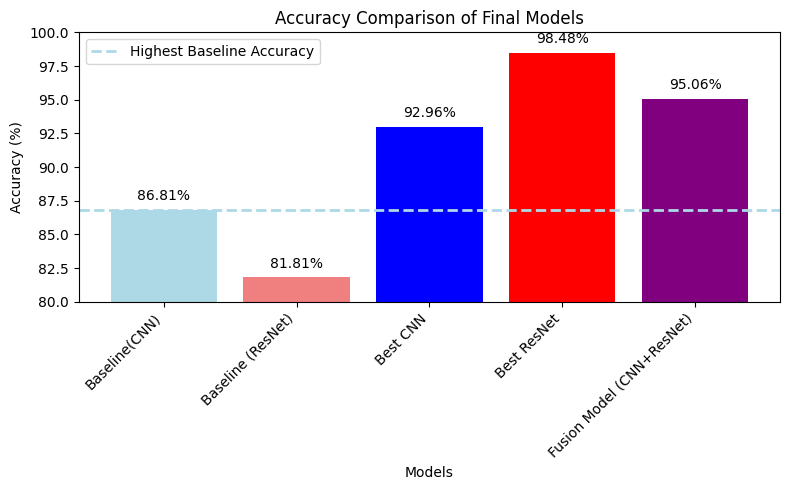

In [104]:
# Model names and their corresponding accuracies
model_names = ['Baseline(CNN)', 'Baseline (ResNet)','Best CNN', 'Best ResNet', 'Fusion Model (CNN+ResNet)']
accuracies = [ 86.81, 81.81, 92.96, 98.48, 95.06]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['lightblue','lightcoral', 'blue', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Final Models')

# Add labels for each bar with adjusted vertical alignment (va)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom')
    

# Add a horizontal line to indicate the baseline accuracy
baseline_accuracy = 86.81
plt.axhline(y=baseline_accuracy, color='lightblue', linestyle='--', label='Highest Baseline Accuracy', linewidth=2)

# Rotate the model names by 45 degrees
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.ylim(80, 100)  
plt.legend()
plt.tight_layout()
plt.show()

## Comparing F1, accuracy and precision

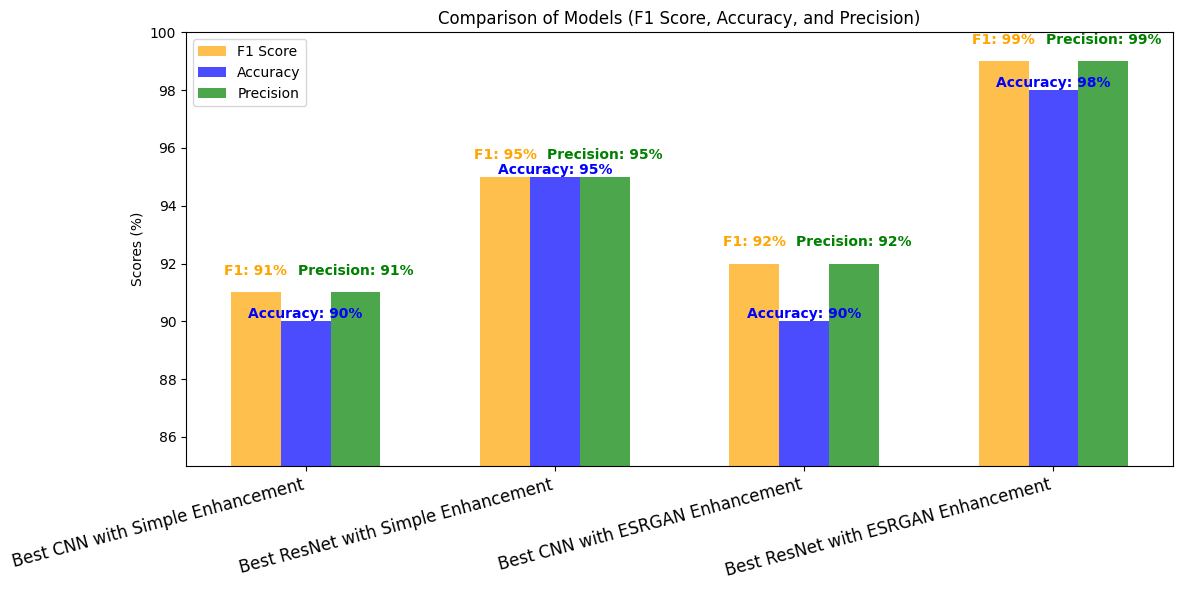

In [37]:
import matplotlib.pyplot as plt

# Model names and their corresponding scores (F1, Accuracy, Precision)
models = [
    "Best CNN with Simple Enhancement",
    "Best ResNet with Simple Enhancement",
    "Best CNN with ESRGAN Enhancement",
    "Best ResNet with ESRGAN Enhancement",
]
f1_scores = [91, 95, 92, 99]
accuracies = [90, 95, 90, 98]
precisions = [91, 95, 92, 99]

# Create a bar plot with three bars for F1, Accuracy, and Precision
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = range(len(models))

plt.bar(index, f1_scores, bar_width, label='F1 Score', color='orange', alpha=0.7)
plt.bar([i + bar_width for i in index], accuracies, bar_width, label='Accuracy', color='blue', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], precisions, bar_width, label='Precision', color='green', alpha=0.7)

plt.ylabel('Scores (%)')
plt.title('Comparison of Models (F1 Score, Accuracy, and Precision)')
plt.xticks([i + bar_width for i in index], models, rotation=15, ha='right', fontsize=12)

# Add labels for each bar with adjusted vertical alignment (va)
for i, (f1, acc, prec) in enumerate(zip(f1_scores, accuracies, precisions)):
    plt.text(i, f1 + 0.5, f'F1: {f1}%', ha='center', va='bottom', color='orange', fontweight='bold')
    plt.text(i + bar_width, acc , f'Accuracy: {acc}%', ha='center', va='bottom', color='blue', fontweight='bold')
    plt.text(i + 2 * bar_width, prec + 0.5, f'Precision: {prec}%', ha='center', va='bottom', color='green', fontweight='bold')

# Move the legend to the left-hand side
plt.legend(loc='upper left')

# Show the plot
plt.ylim(85, 100)
plt.tight_layout()
plt.show()
